# 双極子データの解析@メタノール

## 2023/10/3 :: ethanolの10psデータの計算（CCP2023 proceeding用）

## 屈折率は[1.4326](https://www.sccj-ifscc.com/library/glossary_detail/1547)

## 今までの計算データ

1: 32分子：ohtakaのデータ(/home/k0151/k015124/15_Ethanol/)
    2023/10/3現在，まだ10ps分しか終わっていないので，継続的にデータをとってより長時間のtrajectoryを取得する．どうもちゃんと緩和できているか怪しいので，理想的には25psくらいとって後ろの20psを使いたいところ．
 

In [1]:
# plt.scatter(co_train_pred,co_train_true,label="train",alpha=0.2,color="#1f77b4",s=5)
# plt.scatter(co_test_pred,co_test_true,label="test",alpha=0.2, color='#ff7f0e',s=5)

# plt.scatter(ch_train_pred,ch_train_true, alpha=0.1,color="#1f77b4",s=5)
# plt.scatter(ch_test_pred,ch_test_true,alpha=0.1, color='#ff7f0e',s=5)

# plt.scatter(oh_train_pred,oh_train_true,alpha=0.1,color="#1f77b4",s=5)
# plt.scatter(oh_test_pred,oh_test_true,alpha=0.1, color='#ff7f0e',s=5)

# plt.scatter(o_train_pred,o_train_true,alpha=0.1,color="#1f77b4",s=5)
# plt.scatter(o_test_pred,o_test_true,alpha=0.1, color='#ff7f0e',s=5)

# plt.xlim(0,3.5)
# plt.ylim(0,3.5)
# #plt.title("This is a title")
# plt.xlabel("DNN predicted dipole [D] ")
# plt.ylabel("QE dipole [D] ")
# plt.grid(True)
# # plt.title(str(c))
# plt.legend()
# plt.savefig(load_dir+"methanol_1mol.png")
# plt.show()


In [2]:
import datetime
dt_now = datetime.datetime.now()
print(dt_now.strftime('%Y%m%d'))

import os
os.mkdir(str(dt_now.strftime('%Y%m%d')))

datetoday=str(dt_now.strftime('%Y%m%d'))

20231026


FileExistsError: [Errno 17] File exists: '20231026'

In [3]:
#予測したモデルを使ったUnit Cellの双極子モーメントの計算
import numpy as np
#時間軸の計算用
times = []

# dt (a.u.) in Trajectories
# !! SHOULD BE THE SAME FOR ALL INPUTS !!
dt = 40 # 1fs 
au2ps = 2.4189e-17 /1.0e-15/1.0e3 
# cell_dipoles_pred = np.load("result_dipole.npy")


# まずは双極子データを可視化しておかしなことになっていないか見てみよう．

[ -0.825804  -0.882519  -1.06345  ... -17.8757   -17.6009   -17.3522  ]
(117000, 3)
9.21732
4.803206083390294


Text(0.5, -0.01, 'The predicted dipole moments of 10 PPG725 molecules for 1ns with dt=10fs.')

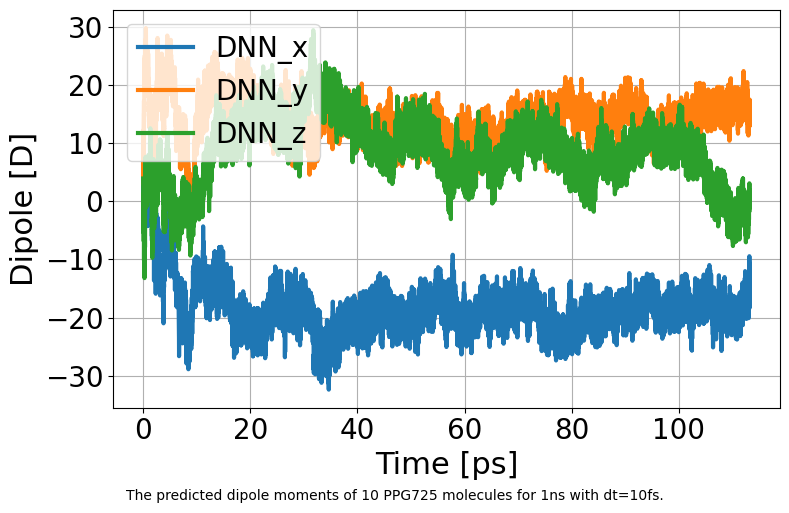

In [5]:

#
# * unit_cellの双極子結果の図示
# * 一つのconfigurationをとってきて図示（おかしなことになっていないか）
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,5),tight_layout=True) # figure, axesオブジェクトを作成

# reading data
i=10
# filename_tmp="20ps_1/wannier_dipole.npy"

filename_tmp="dipole_20ps_"+str(i)+"_1006/total_dipole.txt" 
filename_tmp="/Volumes/Realtek RTL9210B-CG Media_2/12_methanol/100ps_dt1_methanol/dipole_100ps_4/total_dipole.txt"

cell_dipoles_pred=np.loadtxt(filename_tmp)[:,1:]
print(cell_dipoles_pred[:,0])
print(np.shape(cell_dipoles_pred))
print(np.max(cell_dipoles_pred[:,0]))

# i=2
# filename_tmp="result_dipole_100ns/"+"/result_dipole_"+str(i)+"_500K.npy"


# ! 100nsのtrajectoryデータは
# /work/k0151/k015124/14_pg/20230518_1ns_gromacs/60mol_100ns_2/gromacs_test
# にある

from include.constants import constant  
# Debye   = 3.33564e-30
# charge  = 1.602176634e-019
# ang      = 1.0e-10 
coef    = constant.Ang*constant.Charge/constant.Debye
print(coef)  # 4.803206083390294

# cell_dipoles_pred=np.loadtxt(filename_tmp)
# ax.plot(dt*au2ps*np.arange(len(cell_dipoles_pred[:,0])), cell_dipoles_pred[:,0]-cell_dipoles_pred[0,0], label="DNN_x", lw=3)  # 描画
# ax.plot(dt*au2ps*np.arange(len(cell_dipoles_pred[:,1])), cell_dipoles_pred[:,1]-cell_dipoles_pred[1,0], label="DNN_y", lw=3)  # 描画
# ax.plot(dt*au2ps*np.arange(len(cell_dipoles_pred[:,2])), cell_dipoles_pred[:,2]-cell_dipoles_pred[2,0], label="DNN_z", lw=3)  # 描画

# timestep in ps
timestep=dt*au2ps

ax.plot(timestep*np.arange(len(cell_dipoles_pred[:,0])), cell_dipoles_pred[:,0], label="DNN_x", lw=3)  # 描画
ax.plot(timestep*np.arange(len(cell_dipoles_pred[:,1])), cell_dipoles_pred[:,1], label="DNN_y", lw=3)  # 描画
ax.plot(timestep*np.arange(len(cell_dipoles_pred[:,2])), cell_dipoles_pred[:,2], label="DNN_z", lw=3)  # 描画

# 各要素で設定したい文字列の取得
xticklabels = ax.get_xticklabels()
yticklabels = ax.get_yticklabels()
xlabel="Time [ps]"
ylabel="Dipole [D]"

# 各要素の設定を行うsetコマンド
ax.set_xlabel(xlabel,fontsize=22)
ax.set_ylabel(ylabel,fontsize=22)

# ax.set_xlim(0,500)
# ax.set_ylim(-100,100)
ax.grid()

ax.tick_params(axis='x', labelsize=20 )
ax.tick_params(axis='y', labelsize=20 )

# ax.legend = ax.legend(*scatter.legend_elements(prop="colors"),loc="upper left", title="Ranking")

lgnd=ax.legend(loc="upper left",fontsize=20)
# lgnd.legendHandles[0]._sizes = [30]
# lgnd.legendHandles[0]._alpha = [1.0]


#pyplot.savefig("eps_real2.pdf",transparent=True)

fig.text(0.5, -0.01, "The predicted dipole moments of 10 PPG725 molecules for 1ns with dt=10fs.", ha="center")
# fig.savefig(datetoday+"/dipole_by_500Kmodel_magnify_0721.png", bbox_inches='tight')



# 学習結果を使って，実際の双極子モーメントの予測値との乖離をみていく．


In [45]:
# 
# * システムのパラメータ（格子定数と温度）
TEMPERATURE =300 
L = 12.9444 # 32分子メタノール
UNITCELL_VECTORS = np.array([
    [L, 0,0],
    [0, L,0],
    [0,0, L]
])

In [59]:
def calc_acf(cell_dipoles_pred):
    '''
    filename :: *.npy
    '''
    # 誘電関数の計算まで
    import statsmodels.api as sm 
    import numpy as np
    # cell_dipoles_pred = np.load(filename)
    
    # N=int(np.shape(cell_dipoles_pred)[0]/2)
    N=int(np.shape(cell_dipoles_pred)[0])
    # N=99001
    print("nlag :: ", N)

    # >>>>>>>>>>>
    eps0 = 8.8541878128e-12
    debye = 3.33564e-30
    nm3 = 1.0e-27
    nm = 1.0e-9
    A3 = 1.0e-30
    kb = 1.38064852e-23

    V = np.abs(np.dot(np.cross(UNITCELL_VECTORS[:,0],UNITCELL_VECTORS[:,1]),UNITCELL_VECTORS[:,2])) * A3
    ## V = np.abs(np.dot(np.cross(traj[0].UNITCELL_VECTOR[:,0],traj[0].UNITCELL_VECTOR[:,1]),traj[0].UNITCELL_VECTOR[:,2])) * A3
    print("SUPERCELL VOLUME (m^3) :: ", V )

    # 予測値
    dMx_pred=cell_dipoles_pred[:,0] #-cell_dipoles_pred[0,0]
    dMy_pred=cell_dipoles_pred[:,1] #-cell_dipoles_pred[0,1]
    dMz_pred=cell_dipoles_pred[:,2] #-cell_dipoles_pred[0,2]
    
    #自己相関関数を求める
    #（元々nlag=N,fft=Falseだった）
    acf_x_pred = sm.tsa.stattools.acf(dMx_pred,nlags=N,fft=True)
    acf_y_pred = sm.tsa.stattools.acf(dMy_pred,nlags=N,fft=True)
    acf_z_pred = sm.tsa.stattools.acf(dMz_pred,nlags=N,fft=True)
    pred_data =(acf_x_pred+acf_y_pred+acf_z_pred)/3

    time=times[:len(acf_x_pred)]

    # 平均値計算
    mean_M2=(np.mean(dMx_pred**2)+np.mean(dMy_pred**2)+np.mean(dMz_pred**2))
    mean_M=np.mean(dMx_pred)**2+np.mean(dMy_pred)**2+np.mean(dMz_pred)**2

    # 比誘電率
    eps_0 = 1.0 + ((mean_M2-mean_M)*debye**2)/(3.0*V*kb*TEMPERATURE*eps0)

    # 比誘電率
    # eps_0 = 1.0 + ((np.mean(dMx_pred**2+dMy_pred**2+dMz_pred**2))*debye**2)/(3.0*V*kbT*eps0)
    print("EPS_0 {0}, mean_M {1}, mean_M2 {2}:: ".format(eps_0, mean_M, mean_M2))
    return eps_0, time, pred_data

def calc_eps0(cell_dipoles_pred):
    '''
    eps0だけ計算する．    
    '''
        # 誘電関数の計算まで
    import statsmodels.api as sm 
    import numpy as np
    # cell_dipoles_pred = np.load(filename)
    
    # N=int(np.shape(cell_dipoles_pred)[0]/2)
    N=int(np.shape(cell_dipoles_pred)[0])
    # N=99001
    # print("nlag :: ", N)

    # >>>>>>>>>>>
    eps0 = 8.8541878128e-12
    debye = 3.33564e-30
    nm3 = 1.0e-27
    nm = 1.0e-9
    A3 = 1.0e-30
    kb = 1.38064852e-23

    V = np.abs(np.dot(np.cross(UNITCELL_VECTORS[:,0],UNITCELL_VECTORS[:,1]),UNITCELL_VECTORS[:,2])) * A3
    ## V = np.abs(np.dot(np.cross(traj[0].UNITCELL_VECTOR[:,0],traj[0].UNITCELL_VECTOR[:,1]),traj[0].UNITCELL_VECTOR[:,2])) * A3
    # print("SUPERCELL VOLUME (m^3) :: ", V )

    # 予測値
    dMx_pred=cell_dipoles_pred[:,0] #-cell_dipoles_pred[0,0]
    dMy_pred=cell_dipoles_pred[:,1] #-cell_dipoles_pred[0,1]
    dMz_pred=cell_dipoles_pred[:,2] #-cell_dipoles_pred[0,2]
    
    # 平均値計算
    mean_M2=(np.mean(dMx_pred**2)+np.mean(dMy_pred**2)+np.mean(dMz_pred**2))
    mean_M=np.mean(dMx_pred)**2+np.mean(dMy_pred)**2+np.mean(dMz_pred)**2

    # 比誘電率
    eps_0 = 1.0 + ((mean_M2-mean_M)*debye**2)/(3.0*V*kb*TEMPERATURE*eps0)

    # 比誘電率
    # eps_0 = 1.0 + ((np.mean(dMx_pred**2+dMy_pred**2+dMz_pred**2))*debye**2)/(3.0*V*kbT*eps0)
    # print("EPS_0 {0}, mean_M {1}, mean_M2 {2}:: ".format(eps_0, mean_M, mean_M2))
    return [eps_0, mean_M2, mean_M]


In [120]:
#
# * eps_0の計算
# * acfの計算（絶対に必要なところ！！）
# TODO :: calc_acf関数を利用しているのでそれを置き換えたい

eps_0 = 0
pred=[]
eps_list=[]

# length_list
length_list=[]

NUM_TRAJ =  7
for i in range(4,NUM_TRAJ+4):

    # filename="dipole_ohtaka_20ps_"+str(i)+"/result_dipole.npy"
    filename=f"/Volumes/Realtek RTL9210B-CG Media_2/12_methanol/100ps_dt1_methanol/dipole_100ps_{i}/total_dipole.txt"

    # filename="dipole_20ps_"+str(i)+"_1006/total_dipole.txt" 
    if os.path.isfile(filename) == False:
        print("FILE NOT FOUND")
        continue
    print(i)
    # cell_dipole_pred = np.load(filename)[:30000,] # result_dipole.npyから
    cell_dipole_pred = np.loadtxt(filename)[:20000,1:] # totaldipole.txtから
    print(len(cell_dipole_pred))
    eps_0_tmp, time, pred_data = calc_acf(cell_dipole_pred)
    length_list.append(len(pred_data))
    # eps_0_tmp, time, pred_data = calc_acf("../20230525_fugaku_20ps_dt05/wannier_dipole_"+str(i)+".npy")
    pred.append(pred_data) # TODO :: 長さの修正
    eps_list.append(eps_0_tmp)

print(" =================== ")
print("eps_0 :: {}".format(np.average(np.array(eps_list))))
    
print(" =================== ")    
print(length_list)

4
20000
nlag ::  20000
SUPERCELL VOLUME (m^3) ::  2.168931191160384e-27
EPS_0 6.664509157999532, mean_M 470.7562698555309, mean_M2 592.2416682901367:: 
5
20000
nlag ::  20000
SUPERCELL VOLUME (m^3) ::  2.168931191160384e-27
EPS_0 9.971423673732016, mean_M 643.0038186213249, mean_M2 835.4118365322527:: 
6
20000
nlag ::  20000
SUPERCELL VOLUME (m^3) ::  2.168931191160384e-27
EPS_0 5.710896872185962, mean_M 713.1573775475642, mean_M2 814.1908771039431:: 
7
20000
nlag ::  20000
SUPERCELL VOLUME (m^3) ::  2.168931191160384e-27
EPS_0 4.504575232408947, mean_M 1875.9679101665638, mean_M2 1951.1297126418926:: 
8
20000
nlag ::  20000
SUPERCELL VOLUME (m^3) ::  2.168931191160384e-27
EPS_0 2.2430977250308617, mean_M 876.7029051148616, mean_M2 903.3633302648951:: 
9
20000
nlag ::  20000
SUPERCELL VOLUME (m^3) ::  2.168931191160384e-27
EPS_0 4.67597241335814, mean_M 1065.564681246122, mean_M2 1144.4023988338442:: 
10
20000
nlag ::  20000
SUPERCELL VOLUME (m^3) ::  2.168931191160384e-27
EPS_0 5.1989

In [121]:
#
# * 複数のトラジェクトリを平均化

"""
pred_mean np.ndarray:
    name is the name of Alice.
"""

# trajectoryの平均化
pred_mean = np.mean(np.array(pred), axis = 0) # 
print(" len(pred) :: {}".format(len(pred)))
print(" shape(pred) :: {}".format(np.shape(pred)))
print(" shape(pred_mean) {}".format(np.shape(pred_mean)))

# debug
# print(pred_mean-pred[1])
# assert np.min(np.abs(pred_mean-pred[1])) > 0

eps_0 = np.mean(np.array(eps_list))
eps_0_var=np.var(np.array(eps_list))
print("eps_0 :: {}".format(eps_0))
print("eps_0_var :: {}".format(eps_0_var))


 len(pred) :: 7
 shape(pred) :: (7, 20000)
 shape(pred_mean) (20000,)
eps_0 :: 5.5670671737611785
eps_0_var :: 4.818658712021699


In [122]:
# 
# ACFデータの保存
np.save("average_acf_THz_20231026_met_pred.npy", pred_mean)
# np.save("100ps_114/average_acf_1ns_114.npy", pred_mean)

In [123]:
for i,pred_tmp in enumerate(pred):
    # print(pred_tmp[100])
    if pred_tmp[100] < 0.5:
        print(i)
    

Text(0.5, -0.01, 'The predicted ACF of 10 PPG725 molecules for 1ns with dt=10fs. We used 24 trajectories.')

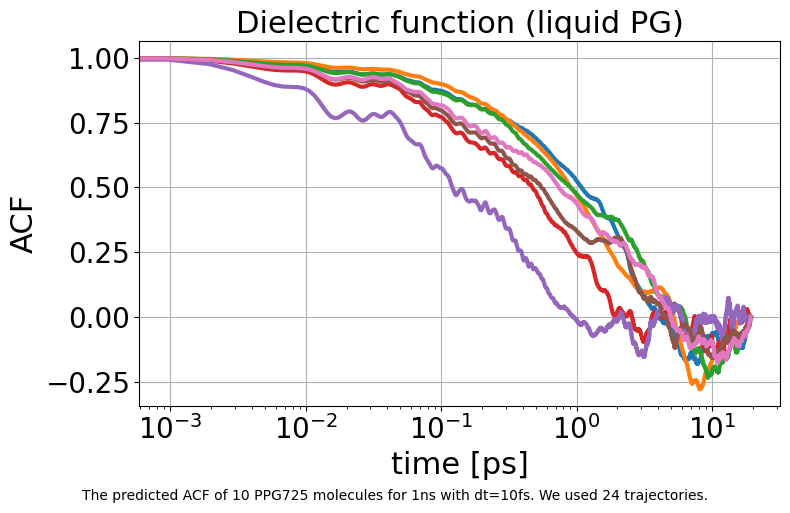

In [124]:
#
# * ACFの図示


# 
# pred_mean=np.load("average_acf_50.npy")
# pred_mean=np.load("100ps_102/average_acf_1ns_102.npy")
# pred_mean=pred_data
#
# * unit_cellの計算結果の図示
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,5),tight_layout=True) # figure, axesオブジェクトを作成

counter=1
for pred_tmp in pred:
    ax.plot(dt*au2ps*np.arange(len(pred_tmp)), pred_tmp, label="PRED_"+str(counter), lw=3)  # 描画
    counter=+1
# ax.plot(dt*au2ps*np.arange(len(pred_mean)), pred_mean, label="PRED", lw=3)  # 描画
# ax.plot(time, pred_mean_rotate, label="PRED2", lw=3)  # 描画



# 各要素で設定したい文字列の取得
xticklabels = ax.get_xticklabels()
yticklabels = ax.get_yticklabels()
xlabel="time [ps]"
ylabel="ACF"
title="Dielectric function (liquid PG)"

# 各要素の設定を行うsetコマンド
ax.set_xlabel(xlabel,fontsize=22)
ax.set_ylabel(ylabel,fontsize=22)

ax.set_title(title,fontsize=22 )

# ax.set_xlim(0,XMAX)
# ax.set_ylim(0,4)
ax.grid()

ax.tick_params(axis='x', labelsize=20 )
ax.tick_params(axis='y', labelsize=20 )

ax.set_xscale('log')
# ax.set_yscale("log")

# ax.legend = ax.legend(*scatter.legend_elements(prop="colors"),loc="upper left", title="Ranking")

# lgnd=ax.legend(loc="upper left",fontsize=20)
# lgnd.legendHandles[0]._sizes = [30]
# lgnd.legendHandles[0]._alpha = [1.0]

fig.text(0.5, -0.01, "The predicted ACF of 10 PPG725 molecules for 1ns with dt=10fs. We used 24 trajectories.", ha="center")
# fig.savefig(datetoday+"/PPG725_30mol_acf_0802_byPPG.png", bbox_inches='tight')


[ 1.00000000e+00  9.97242692e-01  9.90495746e-01 ... -2.70525381e-05
 -1.87705081e-05 -1.03547628e-05]


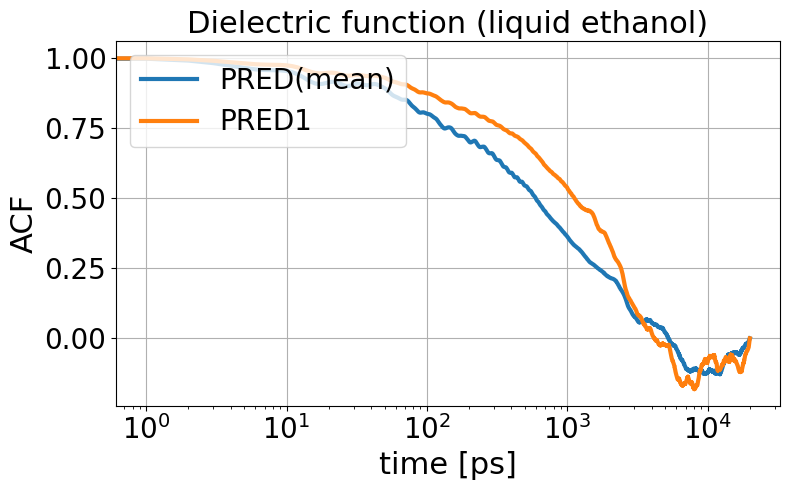

In [125]:
print(pred_mean)
fig, ax = plt.subplots(figsize=(8,5),tight_layout=True) # figure, axesオブジェクトを作成
# ax.plot(time, fw4, label="hann window", lw=3)  # 描画
ax.plot(np.arange(len(pred_mean)), pred_mean, label="PRED(mean)", lw=3)  # 描画
ax.plot(np.arange(len(pred_mean)), pred[0], label="PRED1", lw=3)  # 描画
# 
# ax.plot(time, pred_mean*fw1, label="PRED*window", lw=3)  # 描画

# 各要素で設定したい文字列の取得
xticklabels = ax.get_xticklabels()
yticklabels = ax.get_yticklabels()
xlabel="time [ps]"
ylabel="ACF"
title="Dielectric function (liquid ethanol)"


# 各要素の設定を行うsetコマンド
ax.set_xlabel(xlabel,fontsize=22)
ax.set_ylabel(ylabel,fontsize=22)

ax.set_title(title,fontsize=22 )

# ax.set_xlim(0,XMAX)
# ax.set_ylim(0,4)
ax.grid()

ax.tick_params(axis='x', labelsize=20 )
ax.tick_params(axis='y', labelsize=20 )

ax.set_xscale('log')

# ax.legend = ax.legend(*scatter.legend_elements(prop="colors"),loc="upper left", title="Ranking")
lgnd=ax.legend(loc="upper left",fontsize=20)

# fig.savefig("predict_dipole/leaning_result_acf.png")


In [126]:
#
# * 最後にフーリエ変換
# 
au2ps = 2.4189e-17 /1.0e-15/1.0e3 
au2fs = 2.4189e-17 /1.0e-15 # !! acf_fourierのinputとしてfs単位を使うため．
# TIMESTEP=dt*au2fs # !! 注意
# print("TIMESTEP :: ", TIMESTEP)
TIMESTEP=1 # in fs
print("TIMESTEP :: ", TIMESTEP)

import ml.acf_fourier
import importlib
importlib.reload(ml.acf_fourier)

# フーリエ変換のクラスを定義
FOURIER=ml.acf_fourier.dielec(UNITCELL_VECTORS, TEMPERATURE, TIMESTEP)


# eps_n2 = 1.333**2
# eps_0=20
# eps_n2には屈折率の2乗を入れる？
# 液体メタノール：1.329
# https://www.shodex.com/ja/dc/06/0116.html
print(eps_0)
# https://www.shodex.com/ja/dc/06/0116.html
eps_n2 = 1.329**2   # eps_n2=eps_inf^2 ? (3.1) # 
eps_inf = 1.0     # should be fixed 
#eps_0 = pred_eps
#data=acfs["acf"].to_numpy()

# acfに窓関数をかける！！
from scipy import signal
# 窓関数の一例
# https://dango-study.hatenablog.jp/entry/2021/06/22/201222
fw1 = signal.hann(len(pred_mean)*2)[len(pred_mean):]      # ハニング窓
fw2 = signal.hamming(len(pred_mean)*2)[len(pred_mean):]    # ハミング窓
fw3 = signal.blackman(len(pred_mean)*2)[len(pred_mean):]   # ブラックマン窓
fw4 = signal.gaussian(len(pred_mean)*2,std=len(pred_mean)/5)[len(pred_mean):]   # ガウス窓

# pred_mean[0]=0.5
# pred_mean = pred_mean * fw3
print(fw4)
#data =blur_array



# eps_0 = 4.7
# TIMESTEP =(time[1]-time[0])  # psec.
print("TIMESTEP [fs] :: ", TIMESTEP)

# acfデータ，eps_0，eps_n2から誘電関数の実部と虚部を計算
# rfreq, ffteps1_pred, ffteps2_pred=calc_fourier(pred_mean, eps_0, eps_n2, TIMESTEP)
rfreq, ffteps1_pred, ffteps2_pred=FOURIER.calc_fourier_only(pred_mean*fw1, eps_0, eps_n2)
# rfreq, ffteps1_pred, ffteps2_pred=FOURIER.calc_fourier_only(pred_mean, eps_0, eps_n2)


# convert THz to cm-1
kayser = rfreq * 33.3 

TIMESTEP ::  1
5.5670671737611785
[9.99999992e-01 9.99999930e-01 9.99999805e-01 ... 3.73831645e-06
 3.73364694e-06 3.72898303e-06]
TIMESTEP [fs] ::  1


[ 1.00000000e+00  9.97242692e-01  9.90495746e-01 ... -2.70525381e-05
 -1.87705081e-05 -1.03547628e-05]


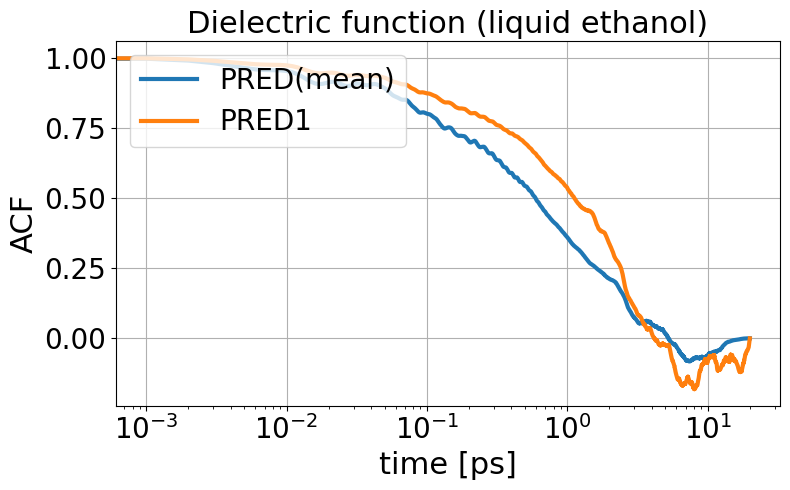

In [127]:
print(pred_mean)
fig, ax = plt.subplots(figsize=(8,5),tight_layout=True) # figure, axesオブジェクトを作成
# ax.plot(time, fw4, label="hann window", lw=3)  # 描画
ax.plot(np.arange(len(pred_mean))*TIMESTEP/1000, fw1*pred_mean, label="PRED(mean)", lw=3)  # 描画
ax.plot(np.arange(len(pred_mean))*TIMESTEP/1000, pred[0], label="PRED1", lw=3)  # 描画
# 
# ax.plot(time, pred_mean*fw1, label="PRED*window", lw=3)  # 描画

# 各要素で設定したい文字列の取得
xticklabels = ax.get_xticklabels()
yticklabels = ax.get_yticklabels()
xlabel="time [ps]"
ylabel="ACF"
title="Dielectric function (liquid ethanol)"


# 各要素の設定を行うsetコマンド
ax.set_xlabel(xlabel,fontsize=22)
ax.set_ylabel(ylabel,fontsize=22)

ax.set_title(title,fontsize=22 )

# ax.set_xlim(0,XMAX)
# ax.set_ylim(0,4)
ax.grid()

ax.tick_params(axis='x', labelsize=20 )
ax.tick_params(axis='y', labelsize=20 )

ax.set_xscale('log')

# ax.legend = ax.legend(*scatter.legend_elements(prop="colors"),loc="upper left", title="Ranking")
lgnd=ax.legend(loc="upper left",fontsize=20)

# fig.savefig("predict_dipole/leaning_result_acf.png")


In [128]:
# #
# # * 最後にフーリエ変換2(窓関数を使う場合)
# # 

# from quadrupole.calc_fourier import calc_fourier

# # eps_n2 = 1.333**2
# # eps_0=20
# # eps_n2には屈折率の2乗を入れる？
# # 液体メタノール：1.329
# # https://www.shodex.com/ja/dc/06/0116.html
# print(eps_0)
# # eps_0= 2.056936680492596 # ? 値がこれでいいのか？
# eps_n2 = 1.4326**2   # eps_n2=eps_inf^2 ? (3.1) 
# eps_inf = 1.0     # should be fixed 
# #eps_0 = pred_eps
# #data=acfs["acf"].to_numpy()

# # acfに窓関数をかける！！
# from scipy import signal
# # 窓関数の一例
# # https://dango-study.hatenablog.jp/entry/2021/06/22/201222
# fw1 = signal.hann(len(pred_mean)*2)[len(pred_mean):]      # ハニング窓
# fw2 = signal.hamming(len(pred_mean)*2)[len(pred_mean):]    # ハミング窓
# fw3 = signal.blackman(len(pred_mean)*2)[len(pred_mean):]   # ブラックマン窓
# fw4 = signal.gaussian(len(pred_mean)*2,std=len(pred_mean)/5)[len(pred_mean):]   # ガウス窓

# # pred_mean[0]=0.5
# # pred_mean = pred_mean * fw3
# print(fw4)
# #data =blur_array



# # eps_0 = 4.7
# # pred_mean[0]=0.52
# # TIMESTEP =(time[1]-time[0])  # psec.
# # print("TIMESTEP [fs] :: ", TIMESTEP*1000)

# rfreq, ffteps1_pred_window, ffteps2_pred_window=FOURIER.calc_fourier_only(pred_mean*fw1, eps_0, eps_n2)
# rfreq, ffteps1_pred, ffteps2_pred=FOURIER.calc_fourier_only(pred_mean, eps_0, eps_n2)
# rfreq, ffteps1_pred1, ffteps2_pred1=FOURIER.calc_fourier_only(pred[1], eps_0, eps_n2)


# # convert THz to cm-1
# kayser = rfreq * 33.3 

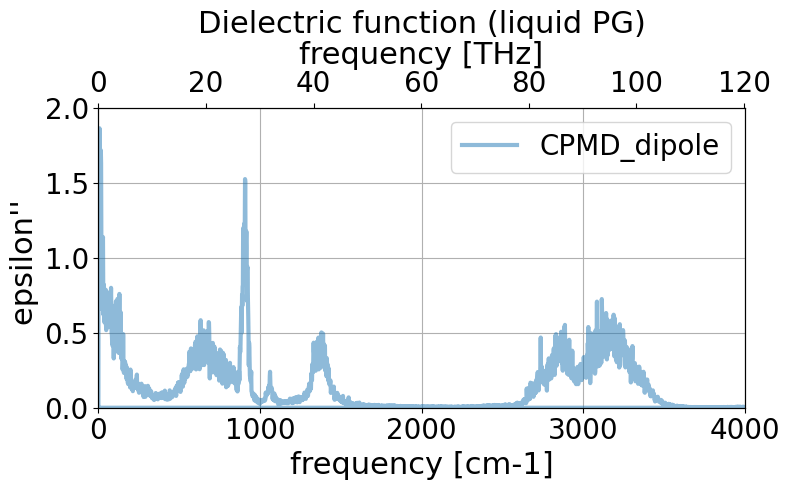

In [129]:

#
# * unit_cellの計算結果の図示
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,5),tight_layout=True) # figure, axesオブジェクトを作成

# ax.plot(kayser, ffteps2_pred_window, label="CPMD_dipole_window", lw=3)  # 描画
ax.plot(kayser, ffteps2_pred, label="CPMD_dipole", lw=3, alpha=0.5)  # 描画
# ax.plot(kayser, ffteps2_pred1, label="CPMD_dipole1", lw=3, alpha=0.5)  # 描画


# 各要素で設定したい文字列の取得
xticklabels = ax.get_xticklabels()
yticklabels = ax.get_yticklabels()
xlabel="frequency [cm-1]"
ylabel="epsilon'' "
title="Dielectric function (liquid PG)"


# 各要素の設定を行うsetコマンド
ax.set_xlabel(xlabel,fontsize=22)
ax.set_ylabel(ylabel,fontsize=22)

ax.set_title(title,fontsize=22 )

XMAX=4000

ax.set_xlim(0,XMAX)
ax.set_ylim(0.0,2.0)
ax.grid()

# 2軸目（twinyを使い、y軸を共通にして同じグラフを書く）
ax2 = ax.twiny()
ax2.set_xlim(0,XMAX/33.3)
## ax2.plot(kayser/33.3, ffteps2_pred)
ax2.set_xlabel('frequency [THz]', fontsize=22)

ax.tick_params(axis='x', labelsize=20 )
ax.tick_params(axis='y', labelsize=20 )
ax2.tick_params(axis='x', labelsize=20 )

# ax.legend = ax.legend(*scatter.legend_elements(prop="colors"),loc="upper left", title="Ranking")

lgnd=ax.legend(loc="upper right",fontsize=20)
# lgnd.legendHandles[0]._sizes = [30]
# lgnd.legendHandles[0]._alpha = [1.0]


#pyplot.savefig("eps_real2.pdf",transparent=True)
# plt.show()
# fig.savefig("result_dipole_60mol/"+datetoday+"dielec_func_THz_rotate.pdf")
# ax.show()
# fig.delaxes(ax)

# plt.legend()
# plt.show()

# comp.plot(x="time",y=["mu_tot_x_pred","mu_tot_x_cpmd"])



NameError: name 'a' is not defined

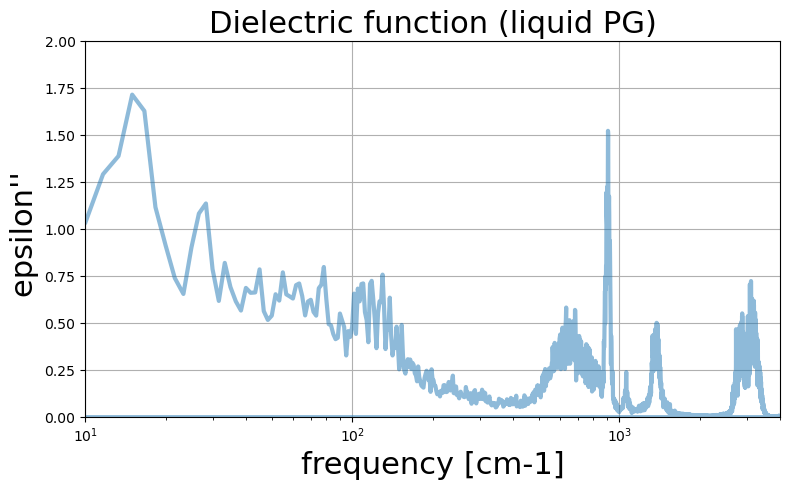

In [130]:

#
# * unit_cellの計算結果の図示
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,5),tight_layout=True) # figure, axesオブジェクトを作成

# ax.plot(kayser, ffteps2_pred_window, label="CPMD_dipole_window", lw=3)  # 描画
ax.plot(kayser, ffteps2_pred, label="CPMD_dipole", lw=3, alpha=0.5)  # 描画
# ax.plot(kayser, ffteps2_pred1, label="CPMD_dipole1", lw=3, alpha=0.5)  # 描画


# 各要素で設定したい文字列の取得
xticklabels = ax.get_xticklabels()
yticklabels = ax.get_yticklabels()
xlabel="frequency [cm-1]"
ylabel="epsilon'' "
title="Dielectric function (liquid PG)"


# 各要素の設定を行うsetコマンド
ax.set_xlabel(xlabel,fontsize=22)
ax.set_ylabel(ylabel,fontsize=22)

ax.set_title(title,fontsize=22 )

XMAX=4000

ax.set_xlim(10,XMAX)
ax.set_ylim(0.0,2.0)
ax.grid()
ax.set_xscale('log')
a

# 2軸目（twinyを使い、y軸を共通にして同じグラフを書く）
ax2 = ax.twiny()
ax2.set_xlim(0,XMAX/33.3)

## ax2.plot(kayser/33.3, ffteps2_pred)
ax2.set_xlabel('frequency [THz]', fontsize=22)

ax.tick_params(axis='x', labelsize=20 )
ax.tick_params(axis='y', labelsize=20 )
ax2.tick_params(axis='x', labelsize=20 )

# ax.legend = ax.legend(*scatter.legend_elements(prop="colors"),loc="upper left", title="Ranking")

lgnd=ax.legend(loc="upper right",fontsize=20)
# lgnd.legendHandles[0]._sizes = [30]
# lgnd.legendHandles[0]._alpha = [1.0]


#pyplot.savefig("eps_real2.pdf",transparent=True)
# plt.show()
# fig.savefig("result_dipole_60mol/"+datetoday+"dielec_func_THz_rotate.pdf")
# ax.show()
# fig.delaxes(ax)

# plt.legend()
# plt.show()

# comp.plot(x="time",y=["mu_tot_x_pred","mu_tot_x_cpmd"])



In [131]:
#
# * 誘電関数データの保存

import pandas as pd

data_df = pd.DataFrame()
print("The DataFrame generated from the NumPy array is:")
print(data_df)

data_df["freq_kayser"] = kayser
data_df["real_diel"]   = ffteps1_pred
data_df["imag_diel"]   = ffteps2_pred

# !! 重要，ファイルを上書きしないこと !!
data_df.to_csv('met_32mol_pred_dielec_THz_100ps_2.csv')

print("The DataFrame generated from the NumPy array is:")
print(data_df)

The DataFrame generated from the NumPy array is:
Empty DataFrame
Columns: []
Index: []
The DataFrame generated from the NumPy array is:
       freq_kayser  real_diel  imag_diel
0            0.000   6.333308   0.000000
1            1.665   5.874564   1.837348
2            3.330   4.413173   1.522236
3            4.995   4.261220   1.551247
4            6.660   3.802837   1.862322
...            ...        ...        ...
9996     16643.340   6.328671   0.000068
9997     16645.005   6.329738  -0.000493
9998     16646.670   6.331168  -0.000351
9999     16648.335   6.332480  -0.000003
10000   -16650.000   6.333308  -0.000000

[10001 rows x 3 columns]


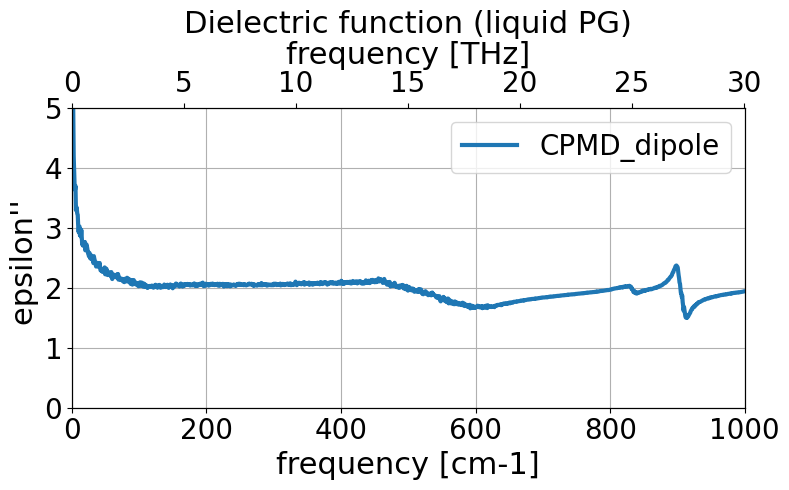

In [36]:

# 
# * unit_cellの計算結果の図示
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,5),tight_layout=True) # figure, axesオブジェクトを作成

ax.plot(kayser, ffteps1_pred, label="CPMD_dipole", lw=3)  # 描画

# 各要素で設定したい文字列の取得
xticklabels = ax.get_xticklabels()
yticklabels = ax.get_yticklabels()
xlabel="frequency [cm-1]"
ylabel="epsilon'' "
title="Dielectric function (liquid PG)"


# 各要素の設定を行うsetコマンド
ax.set_xlabel(xlabel,fontsize=22)
ax.set_ylabel(ylabel,fontsize=22)

ax.set_title(title,fontsize=22 )

XMAX=1000

ax.set_xlim(0,XMAX)
ax.set_ylim(0,5)
ax.grid()

# 2軸目（twinyを使い、y軸を共通にして同じグラフを書く）
ax2 = ax.twiny()
ax2.set_xlim(0,XMAX/33.3)
## ax2.plot(kayser/33.3, ffteps2_pred)
ax2.set_xlabel('frequency [THz]', fontsize=22)

ax.tick_params(axis='x', labelsize=20 )
ax.tick_params(axis='y', labelsize=20 )
ax2.tick_params(axis='x', labelsize=20 )


# ax.legend = ax.legend(*scatter.legend_elements(prop="colors"),loc="upper left", title="Ranking")

lgnd=ax.legend(loc="upper right",fontsize=20)
# lgnd.legendHandles[0]._sizes = [30]
# lgnd.legendHandles[0]._alpha = [1.0]


#pyplot.savefig("eps_real2.pdf",transparent=True)
# plt.show()
# fig.savefig("result_dipole_60mol/eps1_THz_rotate_0607.pdf")
# ax.show()
# fig.delaxes(ax)

# plt.legend()
# plt.show()

# comp.plot(x="time",y=["mu_tot_x_pred","mu_tot_x_cpmd"])



In [217]:
# 誘電関数の実験値とmatlantisデータ
import pandas as pd
expdata=np.loadtxt("expdata/pg_diel2_exp.csv",delimiter=",")
expdata2=np.loadtxt("expdata/pg_eps2_exp2.csv",delimiter=",")
expdata_log=np.loadtxt("pg_diel2_log_exp.csv",delimiter=",")
matlantis = pd.read_csv("../20230623_matlantis/dielec_func_PG_matlantis800.csv")

Text(0.5, -0.05, 'The THz dielectric function from DNN (blue) and experiments (orange,green). \n     Gromacs data is sampled every 10fs, and we averaged 10 1ns-trajectories with 80 molecules. \n     the Gromacs result predicts much smaller values compared to experimental data')

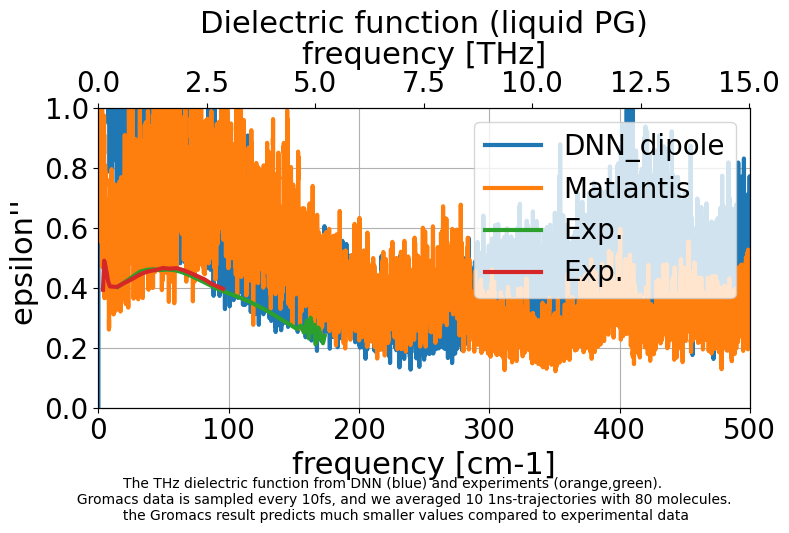

In [225]:

#
# * unit_cellの計算結果の図示
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,5),tight_layout=True) # figure, axesオブジェクトを作成

ax.plot(kayser, ffteps2_pred, label="DNN_dipole", lw=3)  # 描画
ax.plot(matlantis["kayser"], matlantis["eps2_mave10"], label="Matlantis", lw=3)  # 描画

ax.plot(expdata[:,0]*33.3,expdata[:,1],label="Exp.", lw=3)
ax.plot(expdata2[:,0]*33.3,expdata2[:,1],label="Exp.", lw=3)


# 各要素で設定したい文字列の取得
xticklabels = ax.get_xticklabels()
yticklabels = ax.get_yticklabels()
xlabel="frequency [cm-1]"
ylabel="epsilon'' "
title="Dielectric function (liquid PG)"


# 各要素の設定を行うsetコマンド
ax.set_xlabel(xlabel,fontsize=22)
ax.set_ylabel(ylabel,fontsize=22)

ax.set_title(title,fontsize=22 )

XMAX=500

ax.set_xlim(0,XMAX)
ax.set_ylim(0,1)
ax.grid()

# 2軸目（twinyを使い、y軸を共通にして同じグラフを書く）
ax2 = ax.twiny()
ax2.set_xlim(0,XMAX/33.3)
## ax2.plot(kayser/33.3, ffteps2_pred)
ax2.set_xlabel('frequency [THz]', fontsize=22)

ax.tick_params(axis='x', labelsize=20 )
ax.tick_params(axis='y', labelsize=20 )
ax2.tick_params(axis='x', labelsize=20 )


# ax.legend = ax.legend(*scatter.legend_elements(prop="colors"),loc="upper left", title="Ranking")

lgnd=ax.legend(loc="upper right",fontsize=20)
# lgnd.legendHandles[0]._sizes = [30]
# lgnd.legendHandles[0]._alpha = [1.0]

fig.text(.5,-.05, "The THz dielectric function from DNN (blue) and experiments (orange,green). \n \
    Gromacs data is sampled every 10fs, and we averaged 10 1ns-trajectories with 80 molecules. \n \
    the Gromacs result predicts much smaller values compared to experimental data", ha="center")

# fig.savefig("result_dipole_80mol/dielec_func_THz_gromacs_with_exp.png",bbox_inches='tight')



Text(0.5, -0.05, 'The THz dielectric function from DNN (blue) and experiments (orange,green, and red). \n     DNN data is sampled every 10fs, and we averaged 50 1ns-trajectories with 80 molecules. \n     The peak position of DNN data is shifted drastically from experimental one.')

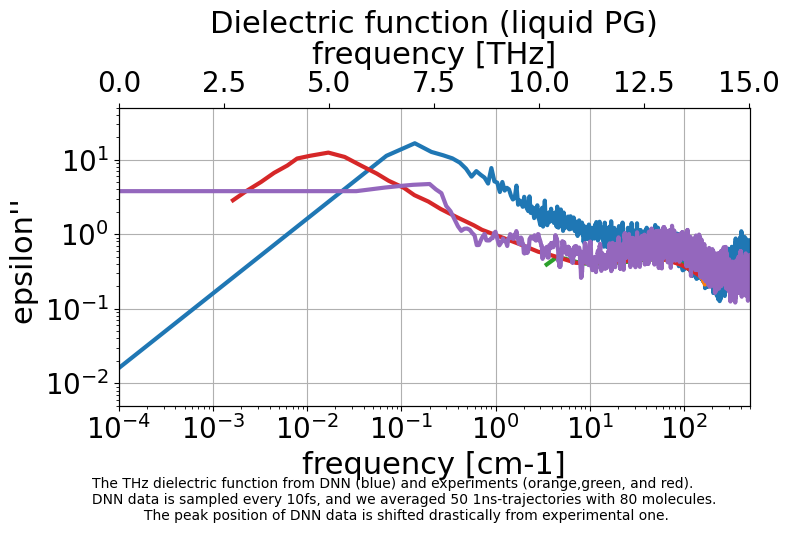

In [224]:

#
# * unit_cellの計算結果の図示
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,5),tight_layout=True) # figure, axesオブジェクトを作成

ax.plot(kayser, ffteps2_pred, label="DNN_dipole", lw=3)  # 描画
ax.plot(expdata[:,0]*33.3,expdata[:,1],label="Exp.", lw=3)
ax.plot(expdata2[:,0]*33.3,expdata2[:,1],label="Exp.", lw=3)
ax.plot(expdata_log[:,0],expdata_log[:,1],label="Exp.", lw=3)
ax.plot(matlantis["kayser"], matlantis["eps2_mave10"], label="Matlantis", lw=3)  # 描画


# 各要素で設定したい文字列の取得
xticklabels = ax.get_xticklabels()
yticklabels = ax.get_yticklabels()
xlabel="frequency [cm-1]"
ylabel="epsilon'' "
title="Dielectric function (liquid PG)"


# 各要素の設定を行うsetコマンド
ax.set_xlabel(xlabel,fontsize=22)
ax.set_ylabel(ylabel,fontsize=22)

ax.set_title(title,fontsize=22 )

XMAX=500

ax.set_xlim(0.0001,XMAX)
ax.set_ylim(0.005,50)
ax.grid()

ax.set_yscale('log')
ax.set_xscale('log')


# 2軸目（twinyを使い、y軸を共通にして同じグラフを書く）
ax2 = ax.twiny()
ax2.set_xlim(0,XMAX/33.3)
## ax2.plot(kayser/33.3, ffteps2_pred)
ax2.set_xlabel('frequency [THz]', fontsize=22)

ax.tick_params(axis='x', labelsize=20 )
ax.tick_params(axis='y', labelsize=20 )
ax2.tick_params(axis='x', labelsize=20 )


# ax.legend = ax.legend(*scatter.legend_elements(prop="colors"),loc="upper left", title="Ranking")

# lgnd=ax.legend(loc="upper right",fontsize=20)
# lgnd.legendHandles[0]._sizes = [30]
# lgnd.legendHandles[0]._alpha = [1.0]

fig.text(.5,-.05, "The THz dielectric function from DNN (blue) and experiments (orange,green, and red). \n \
    DNN data is sampled every 10fs, and we averaged 50 1ns-trajectories with 80 molecules. \n \
    The peak position of DNN data is shifted drastically from experimental one.", ha="center")

# fig.savefig("result_dipole_80mol/dielec_func_THz_rotate_with_exp_log.png")



In [19]:
#
# * 実験値
expdata=np.loadtxt("exp_methanol_dielec.csv", delimiter=",")
expdata_re=np.loadtxt("exp_methanol_re_dielec.csv", delimiter=",")
expdata_alpha=np.loadtxt("exp_methanol_alpha.csv", delimiter=",")
expdata_n=np.loadtxt("exp_methanol_refractiveindex.csv", delimiter=",")

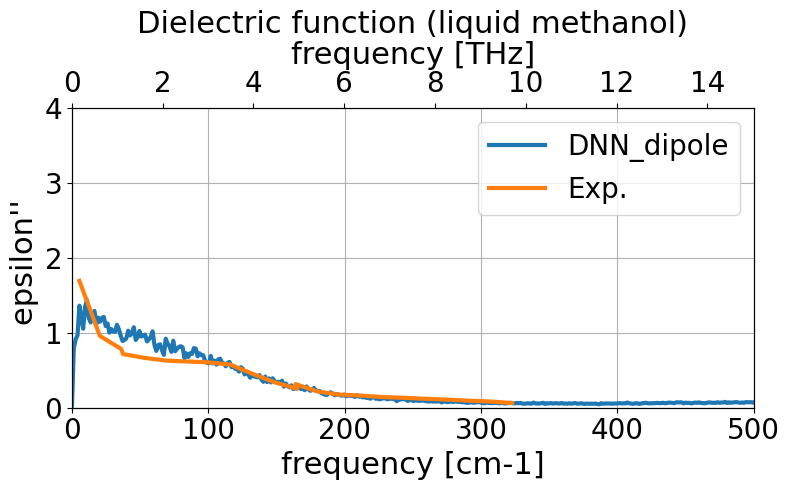

In [20]:

#
# * 誘電関数の図示
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,5),tight_layout=True) # figure, axesオブジェクトを作成

ax.plot(kayser, ffteps2_pred, label="DNN_dipole", lw=3)  # 描画
ax.plot(expdata[:,0]*33.3,expdata[:,1],label="Exp.", lw=3)

# 各要素で設定したい文字列の取得
xticklabels = ax.get_xticklabels()
yticklabels = ax.get_yticklabels()
xlabel="frequency [cm-1]"
ylabel="epsilon'' "
title="Dielectric function (liquid methanol)"


# 各要素の設定を行うsetコマンド
ax.set_xlabel(xlabel,fontsize=22)
ax.set_ylabel(ylabel,fontsize=22)

ax.set_title(title,fontsize=22 )

XMAX=500

ax.set_xlim(0,XMAX)
ax.set_ylim(0,4)
ax.grid()

# 2軸目（twinyを使い、y軸を共通にして同じグラフを書く）
ax2 = ax.twiny()
ax2.set_xlim(0,XMAX/33.3)
## ax2.plot(kayser/33.3, ffteps2_pred)
ax2.set_xlabel('frequency [THz]', fontsize=22)

ax.tick_params(axis='x', labelsize=20 )
ax.tick_params(axis='y', labelsize=20 )
ax2.tick_params(axis='x', labelsize=20 )


# ax.legend = ax.legend(*scatter.legend_elements(prop="colors"),loc="upper left", title="Ranking")

lgnd=ax.legend(loc="upper right",fontsize=20)
# lgnd.legendHandles[0]._sizes = [30]
# lgnd.legendHandles[0]._alpha = [1.0]


#pyplot.savefig("eps_real2.pdf",transparent=True)
# plt.show()
# fig.savefig("im_dielec_func_THz_0426.pdf")
# ax.show()
# fig.delaxes(ax)

# plt.legend()
# plt.show()

# comp.plot(x="time",y=["mu_tot_x_pred","mu_tot_x_cpmd"])



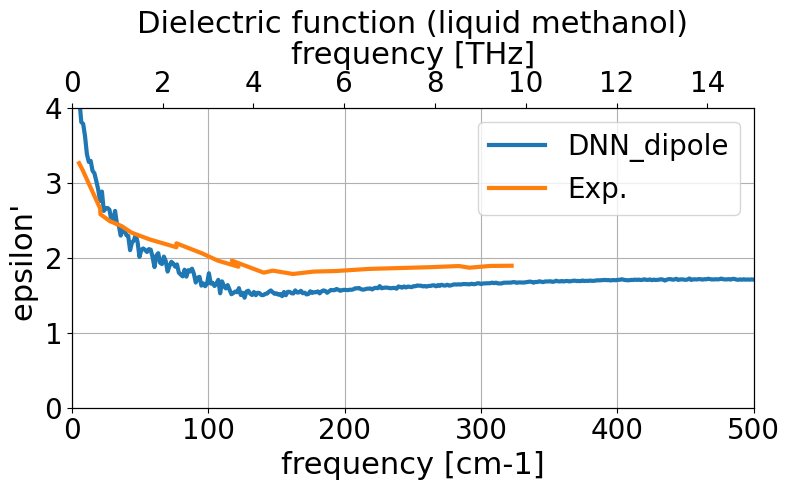

In [21]:

#
# * unit_cellの計算結果の図示
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,5),tight_layout=True) # figure, axesオブジェクトを作成

ax.plot(kayser, ffteps1_pred, label="DNN_dipole", lw=3)  # 描画
ax.plot(expdata_re[:,0]*33.3,expdata_re[:,1],label="Exp.", lw=3)

# 各要素で設定したい文字列の取得
xticklabels = ax.get_xticklabels()
yticklabels = ax.get_yticklabels()
xlabel="frequency [cm-1]"
ylabel="epsilon' "
title="Dielectric function (liquid methanol)"


# 各要素の設定を行うsetコマンド
ax.set_xlabel(xlabel,fontsize=22)
ax.set_ylabel(ylabel,fontsize=22)

ax.set_title(title,fontsize=22 )

XMAX=500

ax.set_xlim(0,XMAX)
ax.set_ylim(0,4)
ax.grid()

# 2軸目（twinyを使い、y軸を共通にして同じグラフを書く）
ax2 = ax.twiny()
ax2.set_xlim(0,XMAX/33.3)
## ax2.plot(kayser/33.3, ffteps2_pred)
ax2.set_xlabel('frequency [THz]', fontsize=22)

ax.tick_params(axis='x', labelsize=20 )
ax.tick_params(axis='y', labelsize=20 )
ax2.tick_params(axis='x', labelsize=20 )


# ax.legend = ax.legend(*scatter.legend_elements(prop="colors"),loc="upper left", title="Ranking")

lgnd=ax.legend(loc="upper right",fontsize=20)
# lgnd.legendHandles[0]._sizes = [30]
# lgnd.legendHandles[0]._alpha = [1.0]


#pyplot.savefig("eps_real2.pdf",transparent=True)
# plt.show()
# fig.savefig("re_dielec_func_THz_0426.pdf")
# ax.show()
# fig.delaxes(ax)

# plt.legend()
# plt.show()

# comp.plot(x="time",y=["mu_tot_x_pred","mu_tot_x_cpmd"])



In [22]:
import cmath
epsilon= ffteps1_pred+1j*ffteps2_pred
refractive_index=[]
re_refractive_index=[]
im_refractive_index=[]

for i in epsilon:
    a,b = cmath.polar(i)
    refractive_index.append(cmath.rect(np.sqrt(a),b/2))


re_refractive_index = [a.real for a in refractive_index ] 
im_refractive_index = [a.imag for a in refractive_index ]  
    

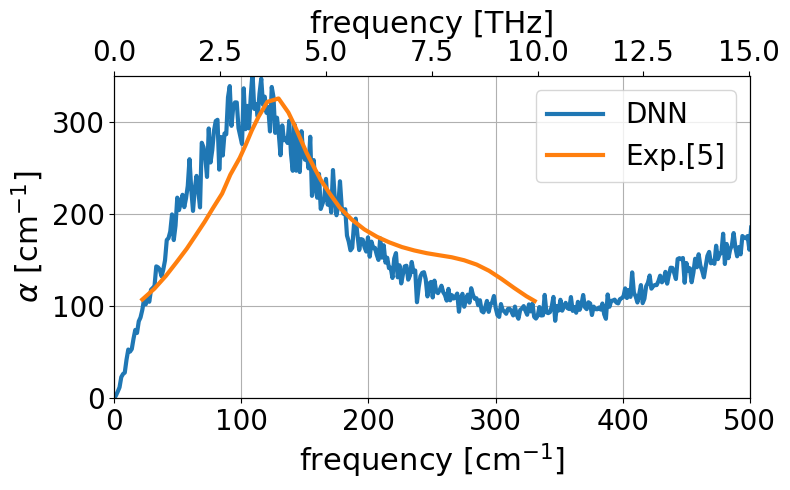

In [24]:

#
# * unit_cellの計算結果の図示
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,5),tight_layout=True) # figure, axesオブジェクトを作成

test = [2*a*b for a,b in zip(re_refractive_index,im_refractive_index)]

ax.plot(kayser, im_refractive_index*kayser/33.3*400*3.14/3, label="DNN", lw=3)  # 描画
ax.plot(expdata_alpha[:,0]*33.3, expdata_alpha[:,1], label="Exp.[5]", lw=3)  # 描画

# ax.plot(expdata_re[:,0]*33.3,expdata_re[:,1],label="Exp.", lw=3)

# 各要素で設定したい文字列の取得
xticklabels = ax.get_xticklabels()
yticklabels = ax.get_yticklabels()
xlabel=r"frequency [$\mathrm{cm}^{-1}$]"
ylabel=r"$\alpha$ [$\mathrm{cm}^{-1}$]"
# title="Alpha (liquid methanol)"


# 各要素の設定を行うsetコマンド
ax.set_xlabel(xlabel,fontsize=22)
ax.set_ylabel(ylabel,fontsize=22)

# ax.set_title(title,fontsize=22 )

XMAX=500

ax.set_xlim(0,XMAX)
ax.set_ylim(0,350)
ax.grid()

# 2軸目（twinyを使い、y軸を共通にして同じグラフを書く）
ax2 = ax.twiny()
ax2.set_xlim(0,XMAX/33.3)
## ax2.plot(kayser/33.3, ffteps2_pred)
ax2.set_xlabel('frequency [THz]', fontsize=22)

ax.tick_params(axis='x', labelsize=20 )
ax.tick_params(axis='y', labelsize=20 )
ax2.tick_params(axis='x', labelsize=20 )


# ax.legend = ax.legend(*scatter.legend_elements(prop="colors"),loc="upper left", title="Ranking")

lgnd=ax.legend(loc="upper right",fontsize=20)
# lgnd.legendHandles[0]._sizes = [30]
# lgnd.legendHandles[0]._alpha = [1.0]


#pyplot.savefig("eps_real2.pdf",transparent=True)
# plt.show()
fig.savefig("alpha_THz_0513_for_abst.pdf")
# ax.show()
# fig.delaxes(ax)

# plt.legend()
# plt.show()

# comp.plot(x="time",y=["mu_tot_x_pred","mu_tot_x_cpmd"])



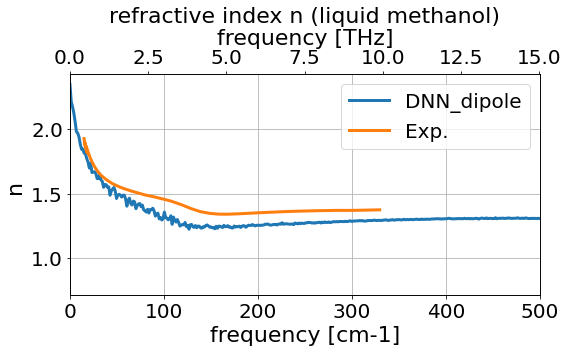

In [19]:

#
# * unit_cellの計算結果の図示
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,5),tight_layout=True) # figure, axesオブジェクトを作成

test = [2*a*b for a,b in zip(re_refractive_index,im_refractive_index)]

ax.plot(kayser, re_refractive_index, label="DNN_dipole", lw=3)  # 描画
ax.plot(expdata_n[:,0]*33.3, expdata_n[:,1], label="Exp.", lw=3)  # 描画

# ax.plot(expdata_re[:,0]*33.3,expdata_re[:,1],label="Exp.", lw=3)

# 各要素で設定したい文字列の取得
xticklabels = ax.get_xticklabels()
yticklabels = ax.get_yticklabels()
xlabel="frequency [cm-1]"
ylabel="n "
title="refractive index n (liquid methanol)"


# 各要素の設定を行うsetコマンド
ax.set_xlabel(xlabel,fontsize=22)
ax.set_ylabel(ylabel,fontsize=22)

ax.set_title(title,fontsize=22 )

XMAX=500

ax.set_xlim(0,XMAX)
# ax.set_ylim(0,350)
ax.grid()

# 2軸目（twinyを使い、y軸を共通にして同じグラフを書く）
ax2 = ax.twiny()
ax2.set_xlim(0,XMAX/33.3)
## ax2.plot(kayser/33.3, ffteps2_pred)
ax2.set_xlabel('frequency [THz]', fontsize=22)

ax.tick_params(axis='x', labelsize=20 )
ax.tick_params(axis='y', labelsize=20 )
ax2.tick_params(axis='x', labelsize=20 )


# ax.legend = ax.legend(*scatter.legend_elements(prop="colors"),loc="upper left", title="Ranking")

lgnd=ax.legend(loc="upper right",fontsize=20)
# lgnd.legendHandles[0]._sizes = [30]
# lgnd.legendHandles[0]._alpha = [1.0]


#pyplot.savefig("eps_real2.pdf",transparent=True)
# plt.show()
fig.savefig("n_THz_0426.pdf")
# ax.show()
# fig.delaxes(ax)

# plt.legend()
# plt.show()

# comp.plot(x="time",y=["mu_tot_x_pred","mu_tot_x_cpmd"])

